In [ ]:
# **IRIS DECISION CLASSIFIER by ROHIT SHARMA**

In [18]:
import pandas as pd
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [19]:
iris=datasets.load_iris()
data=pd.DataFrame(iris.data,columns=iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
y=iris.target
y=pd.DataFrame(y,columns=["Target"])
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [21]:
df=pd.concat([data,y],axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Defining Decesion Tree Classifier**

In [22]:
dtree=DecisionTreeClassifier()
dtree.fit(data,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Plotting the Graph**

In [23]:
dot_data=StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)


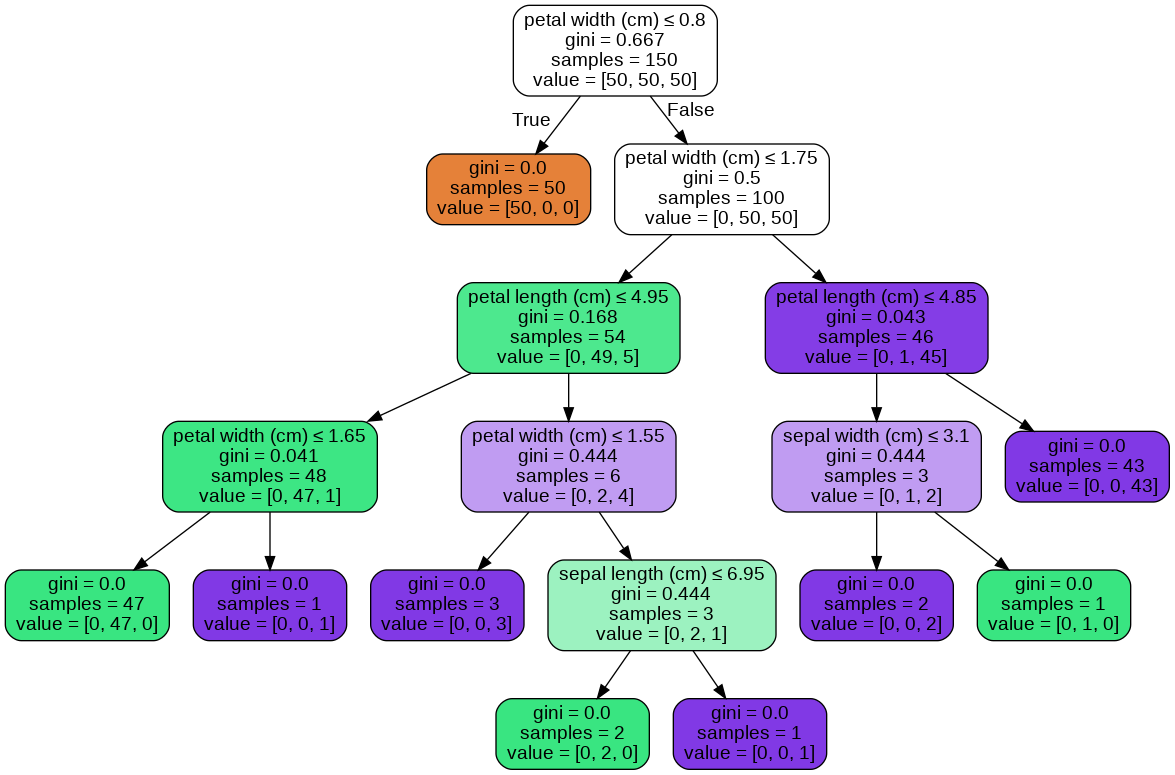

In [24]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [26]:
# to convert the tree in a png image
!dot -Tpng tree.dot > tree.png


Error: dot: can't open tree.dot


**Checking Relation and Accuracy**

In [27]:
df.shape

(150, 5)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [29]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
Target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

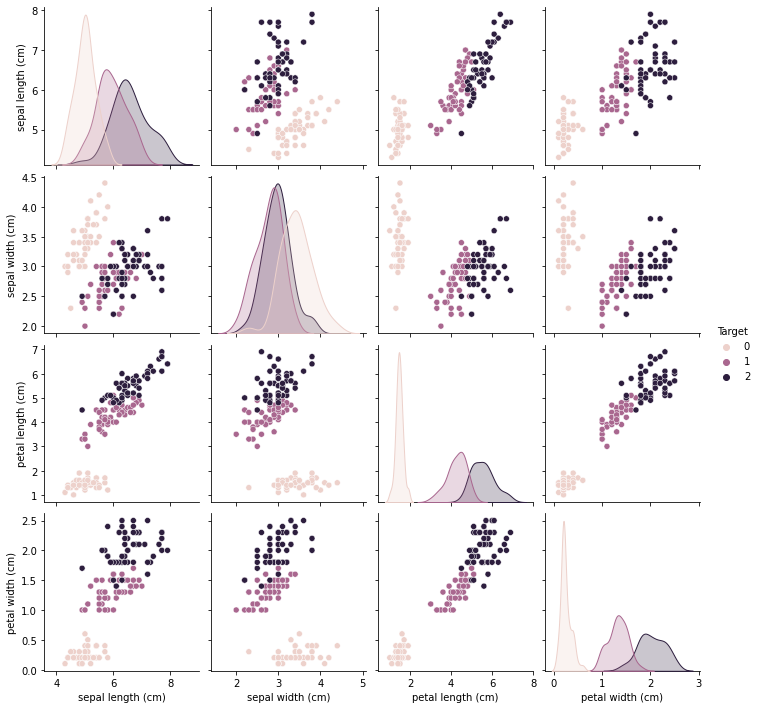

In [31]:
sns.pairplot(df,hue='Target')

<Figure size 720x576 with 0 Axes>

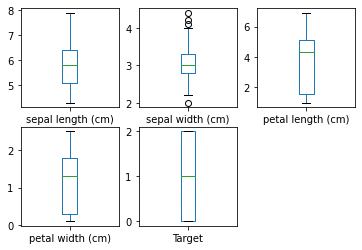

<Figure size 432x288 with 0 Axes>

In [32]:
plt.figure(figsize=[10,8])
df.plot(kind="box",subplots=True,sharey=False,sharex=False,layout=(2,3))
plt.xticks(rotation=90)
plt.show()
plt.tight_layout()

In [33]:
dt_predict=dtree.predict(data)

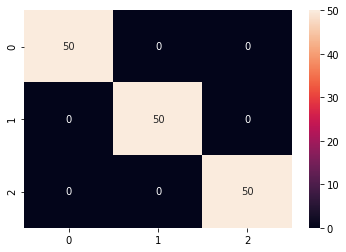

In [34]:
sns.heatmap(confusion_matrix(y,dt_predict),annot=True)

In [35]:
#classification report
classificationreport = classification_report(y,dt_predict)
print(classificationreport)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [36]:
#accuracy 
accuracy = accuracy_score(y,dt_predict)
print("Accuracy is:",accuracy)

Accuracy is: 1.0


In [38]:
xtrain,xtest,ytrain,ytest = train_test_split(data,y,random_state=123,test_size=0.2)

In [39]:
dtree.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [40]:
dt_predict=dtree.predict(xtest)

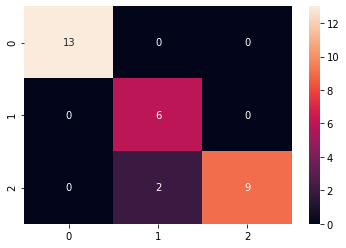

In [41]:
sns.heatmap(confusion_matrix(ytest,dt_predict),annot=True)

In [42]:
#classification report
classificationreport = classification_report(ytest,dt_predict)
print(classificationreport)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.75      1.00      0.86         6
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.92      0.94      0.92        30
weighted avg       0.95      0.93      0.93        30



In [43]:
#accuracy 
accuracy = accuracy_score(ytest,dt_predict)
print("Accuracy is:",accuracy)

Accuracy is: 0.9333333333333333
